Prep: load necessary packages
Either use `pip install pandas matplotlib` or `pip install -r requirements.txt`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Ignore Futures Warnings from the plots
warnings.simplefilter(action='ignore', category=FutureWarning)


## 2. Data cleaning

### 2.1 Load data

In [4]:
df=pd.read_csv("raw_data/heart_disease dataset.csv")

### 2.2 Data overview


Define reusable function

In [5]:
def dfoverview(df):
    """To provide an overview of a dataframe
    Args:
        df: a dataframe
    Returns:
        head, discriptive statistics, info, count of lines with mull, count of lines with na
    
    """
    print("Head of df:")
    print("*"*60)
    print(df.head())
    
    print("\nDescriptive statistics:")
    print("*"*60)
    print(df.describe())
    
    print("\nInfo:")
    print("*"*60)
    print(df.info())
    
    print("\nCheck null:")
    print("*"*60)
    print(df.isnull().sum())
    #show line with null
    print(df[df.isnull().any(axis=1)]) 
    
    print("\nCheck na:")
    print("*"*60)
    print(df.isna().sum())
    #show line with na
    print(df[df.isna().any(axis=1)]) 
    
    print("\nCheck duplicates:")
    print("*"*60)
    print(df.duplicated().sum())
    #show duplicated rows including the first occurance
    print(df[df.duplicated(keep=False)])

In [6]:
dfoverview(df)

Head of df:
************************************************************
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   55    1   1     120   236    0        1       178     0      0.8    2   
4   56    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

Descriptive statistics:
************************************************************
              age         sex          cp      trtbps        chol         fbs  \
count  289.000000  289.000000  289.000000  289.000000  289.000000  289.000000   
mean    54.010381    0.678201    1.020761  131.377163  247.961938    0.1

In [7]:
# Review and handle duplicate rows

# Create a test df to avoid directly delete lines from raw data directly
df_test = df

# From steps above we know that index 163 and 164 are identical records, to see whether they are likely duplicates
# There are less likely 2 people with identical age, resting blood pressure,maximum heart rate and all other chracters  
df_test.iloc[160:170]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


### 2.3 Handling duplicates

In [8]:
# Remove the duplicate from the original df
df.drop_duplicates(inplace=True)

In [9]:
dfoverview(df)

Head of df:
************************************************************
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   55    1   1     120   236    0        1       178     0      0.8    2   
4   56    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

Descriptive statistics:
************************************************************
              age         sex          cp      trtbps        chol         fbs  \
count  288.000000  288.000000  288.000000  288.000000  288.000000  288.000000   
mean    54.065972    0.677083    1.017361  131.354167  248.215278    0.1

In [10]:
df.groupby('output').count()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,124,124,124,124,124,124,124,124,124,124,124,124,124
1,164,164,164,164,164,164,164,164,164,164,164,164,164


### 2.4 Naming conventions/ Data type
*Do we need to adjust some categorical values to meet the need of later analysis? 
No, they are all labeled in numbers with intrinsic order:
e.g. Categorical value, Chest pain type (denoted as "cp"): 1 =  typical angina; 2 = atypical angina; 3 = non-anginal pain;4 = asymptomatic	No*


In [11]:
list(df.columns)

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

### 2.5 Outlier analysis: evaluate inbalance
  * Visualization & statistics methods
  * Cluster Analysis

In [12]:
df[df['output']  == 1].sample(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1


In [13]:
df["output"].value_counts()
df["sex"].value_counts()

sex
1    195
0     93
Name: count, dtype: int64

## 3. Exploratory Data Analysis
 

### 3.1  Data Summary Statistics

In [14]:
def summary_statistics(df):
    """Compute summary statistics for a dataframe, including mean, median, mode, min, and max.
    
    Args:
        df: A pandas dataframe
    
    Returns:
        A dataframe with summary statistics for each numeric column
    """
    # Select only numeric columns for summary statistics
    numeric_cols = df.select_dtypes(include='number')
    
    # Calculate statistics
    stats_df = pd.DataFrame({
        'Mean': numeric_cols.mean(),
        'Median': numeric_cols.median(),
        'Mode': numeric_cols.mode().iloc[0],  # mode() returns a DataFrame, we take the first mode
        'Min': numeric_cols.min(),
        'Max': numeric_cols.max()
    })
    
    return stats_df

# Call the function and display the summary statistics
summary_stats = summary_statistics(df)
print(summary_stats)

                Mean  Median   Mode    Min    Max
age        54.065972   54.00   54.0   29.0   77.0
sex         0.677083    1.00    1.0    0.0    1.0
cp          1.017361    1.00    0.0    0.0    3.0
trtbps    131.354167  130.00  120.0   94.0  200.0
chol      248.215278  243.00  204.0  126.0  564.0
fbs         0.145833    0.00    0.0    0.0    1.0
restecg     0.513889    1.00    1.0    0.0    2.0
thalachh  150.152778  154.00  162.0   71.0  202.0
exng        0.319444    0.00    0.0    0.0    1.0
oldpeak     1.011111    0.65    0.0    0.0    6.2
slp         1.416667    1.00    2.0    0.0    2.0
caa         0.701389    0.00    0.0    0.0    4.0
thall       2.315972    2.00    2.0    0.0    3.0
output      0.569444    1.00    1.0    0.0    1.0


### 3.2 Boxplots

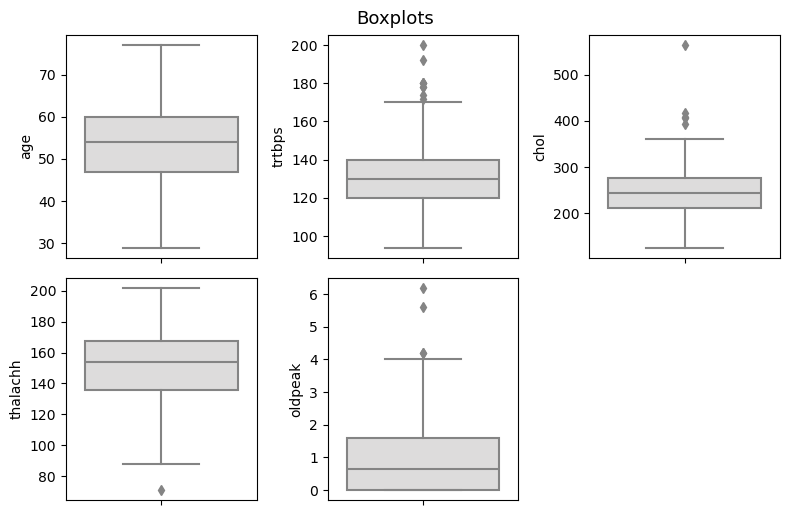

In [15]:
# Numerical variables
vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Set up subplots
fig, axes = plt.subplots(2,3, figsize=(8, 5))  

# Flatten axes array into 1D for easy iteration
axes = axes.flatten()

# Plot a boxplot for each numerical variable
for i, var in enumerate(vars):
    sns.boxplot(data=df, y=var, ax=axes[i], palette='coolwarm')  
    # axes[i].set_ylabel(var)  
    # axes[i].set_xlabel(var)
    

# Remove subplot that we don't want (if we don't have 6 variables)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Add main title
plt.suptitle('Boxplots', fontsize=13, y=1.02)

# Display plot
plt.show()

### 3.3 Distribution of continuous variables variables

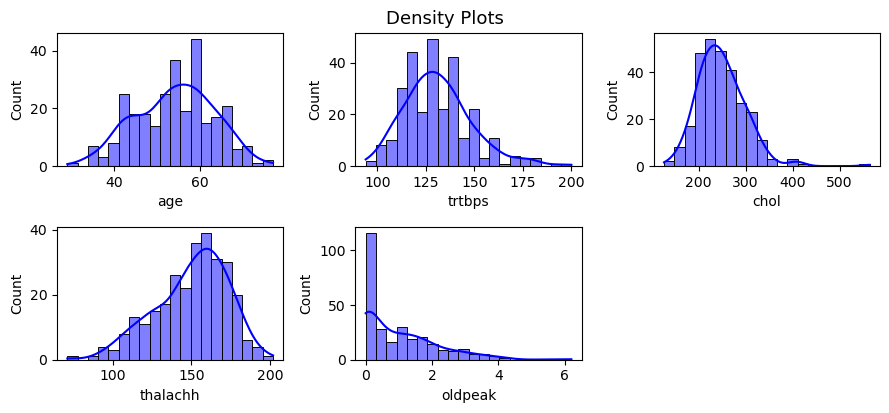

In [16]:
# Histograms for continuous variables

# continuous variables
continuous_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(9, 4))  # s rows and 3 columns

# Flatten axes array into 1D for easy iteration
axes = axes.flatten()

# plot a histogram for each variable
for i, var in enumerate(continuous_vars):
    sns.histplot(df[var], kde=True, ax=axes[i], bins=20, color = 'blue')

# Remove subplot that we don't want. If we don't put it, we will have a 6 subplots instead of 5.
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()  

# Add main title
plt.suptitle('Density Plots', fontsize=13, y=1.02)

# Display plot
plt.show()

#### 3.1.1 Investigate outliers

In [17]:
# based on the visualized data about review potential outliers
dfcopy = df.copy()
dfcopy['high_chol'] = dfcopy['chol'] >= 500
dfcopy['low_thalachh'] = dfcopy['thalachh'] <= 80
dfcopy['high_oldpeak'] = dfcopy['oldpeak'] >= 5
dfcopy['high_trtbps'] = dfcopy['trtbps'] >= 190

# Filter the DataFrame based on any of the conditions being True
filtered_df = dfcopy[dfcopy['high_chol'] | dfcopy['low_thalachh'] | dfcopy['high_oldpeak'] | dfcopy['high_trtbps']]

print(filtered_df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
85    67    0   2     115   564    0        0       160     0      1.6    1   
204   62    0   0     160   164    0        0       145     0      6.2    0   
221   55    1   0     140   217    0        1       111     1      5.6    0   
223   56    0   0     200   288    1        0       133     1      4.0    0   
248   54    1   1     192   283    0        0       195     0      0.0    2   
272   67    1   0     120   237    0        1        71     0      1.0    1   

     caa  thall  output  high_chol  low_thalachh  high_oldpeak  high_trtbps  
85     0      3       1       True         False         False        False  
204    3      3       0      False         False          True        False  
221    0      3       0      False         False          True        False  
223    2      3       0      False         False         False         True  
248    1      3       0      False         False        

*Do we need to take actions of these outliers? No, as there is no evidence that these outliers are cased by measurement error, and that they could be relevant for the prediction analysis.*

*First, outliers of each variable appears in different observations. So it is not likely that one or two sample completely wrongly collected.*

*Second, the outliers could be a reflection of health status of individuals. The anomalies are concentrated among age group >50, which reflects the health risk and chronical conditions tend to increase while aging. These outliers could also provide valuable prediction power and insights for the question that we focus on, therefore should not be removed or compromised.*

*e.g. In the observation 85, the patient has Cholesterol level of 500 mg/dL. This is extremely high based on medical research and regarded as significantly increase the risk of heart disease (https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Borderline%20high%3A%20150%20to%20199,high%3A%20Above%20500%20mg%2FdL). In fact, the individual is indeed diagnosed with heart diease. So we should not remove the data point, but rather should keep it in the sample.*

### 3.4 Distribution of categorical variables

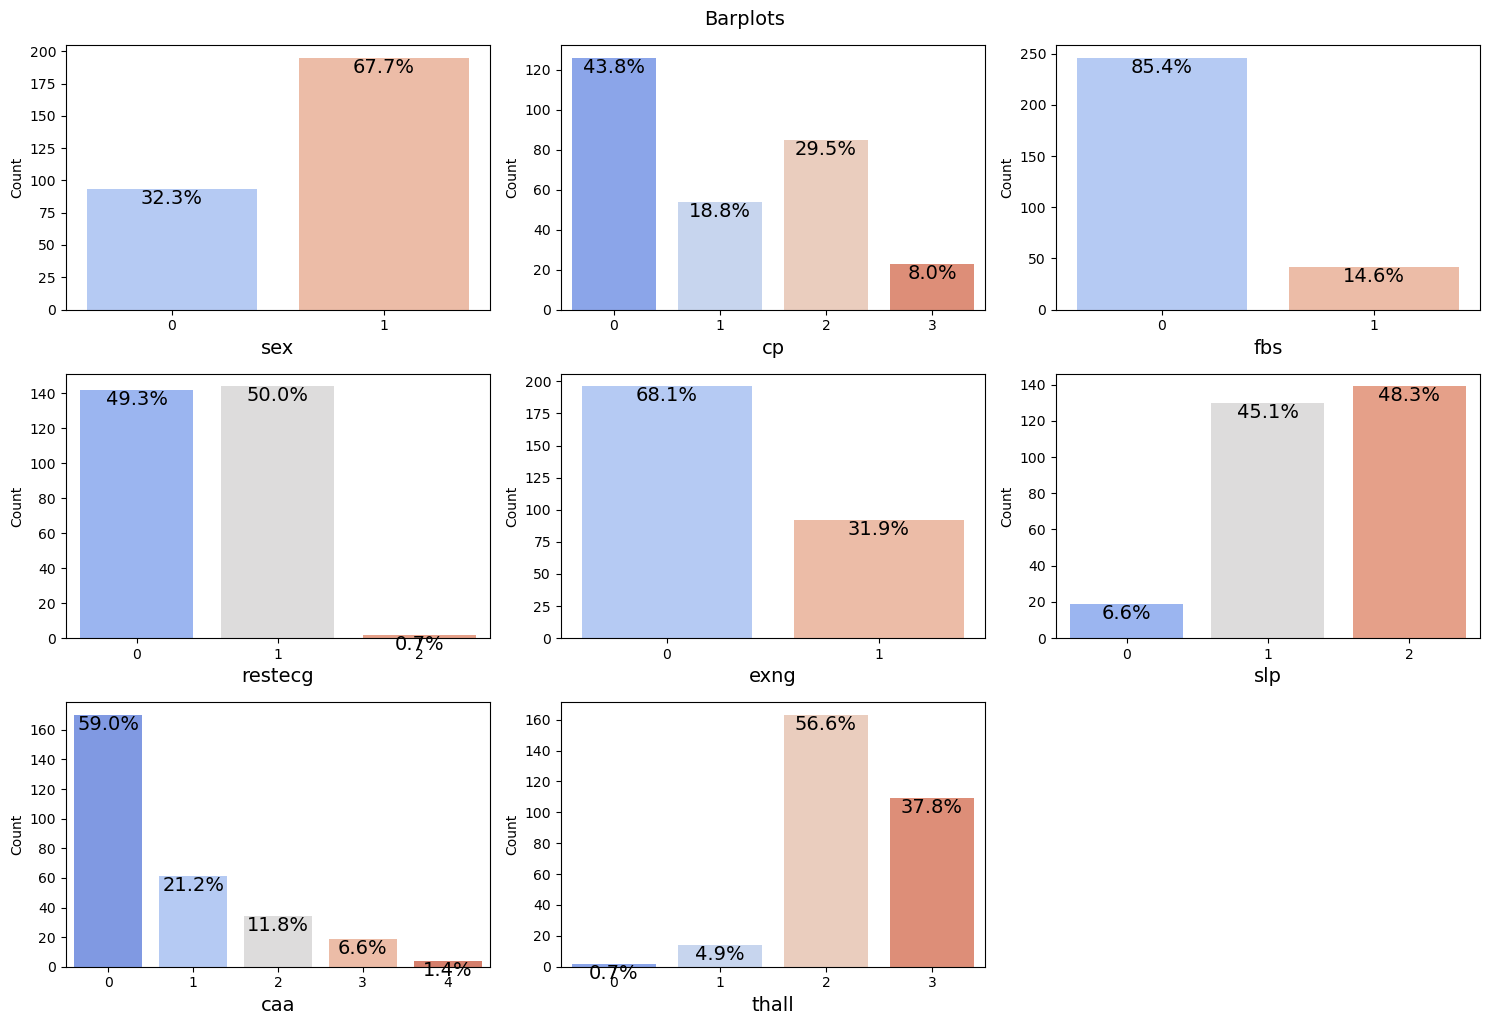

In [18]:
# Categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten axes array into 1D for easy iteration
axes = axes.flatten()

# Plot a bar plot for each categorical variable
for i, var in enumerate(categorical_vars):
    # Create the count plot
    sns.countplot(x=var, data=df, ax=axes[i], palette='coolwarm')

    # Define labels
    axes[i].set_xlabel(var, fontsize = 14)
    axes[i].set_ylabel('Count')

    # Calculate total counts
    total_count = df[var].value_counts().sum()

    # Display percentage in each bar
    for p in axes[i].patches:
        height = p.get_height()
        percentage = (height / total_count) * 100  
        axes[i].text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', size = 14,
                      ha='center', va='top')  

# Remove subplot that we don't want (if there are more than 9 categorical variables)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Add main title
plt.suptitle('Barplots', fontsize=14, y=1.02)

# Display plot
plt.show()



### 3.5 Correlation between variables

#### 3.4.1 Correlation table

In [19]:
 # Calculate the correlation table
df_without_output = df.drop(columns=['output'])
corr_matrix = df_without_output.corr().round(2) # 2 Decimals
display(corr_matrix)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,1.00,-0.12,-0.05,0.27,0.23,0.10,-0.12,-0.39,0.10,0.20,-0.16,0.30,0.06
sex,-0.12,1.00,-0.06,-0.06,-0.19,0.03,-0.05,-0.06,0.14,0.11,-0.05,0.08,0.22
cp,-0.05,-0.06,1.00,0.08,-0.12,0.14,0.05,0.27,-0.35,-0.12,0.09,-0.14,-0.19
trtbps,0.27,-0.06,0.08,1.00,0.15,0.15,-0.09,-0.04,0.07,0.21,-0.14,0.09,0.08
chol,0.23,-0.19,-0.12,0.15,1.00,0.03,-0.16,-0.03,0.10,0.06,-0.01,0.10,0.11
fbs,0.10,0.03,0.14,0.15,0.03,1.00,-0.07,0.01,0.03,-0.02,-0.06,0.12,-0.00
restecg,-0.12,-0.05,0.05,-0.09,-0.16,-0.07,1.00,0.06,-0.09,-0.09,0.14,-0.10,-0.02
thalachh,-0.39,-0.06,0.27,-0.04,-0.03,0.01,0.06,1.00,-0.38,-0.35,0.38,-0.23,-0.11
exng,0.10,0.14,-0.35,0.07,0.10,0.03,-0.09,-0.38,1.00,0.29,-0.26,0.14,0.22
oldpeak,0.20,0.11,-0.12,0.21,0.06,-0.02,-0.09,-0.35,0.29,1.00,-0.59,0.20,0.26


#### 3.4.2 Heatmap of correlations

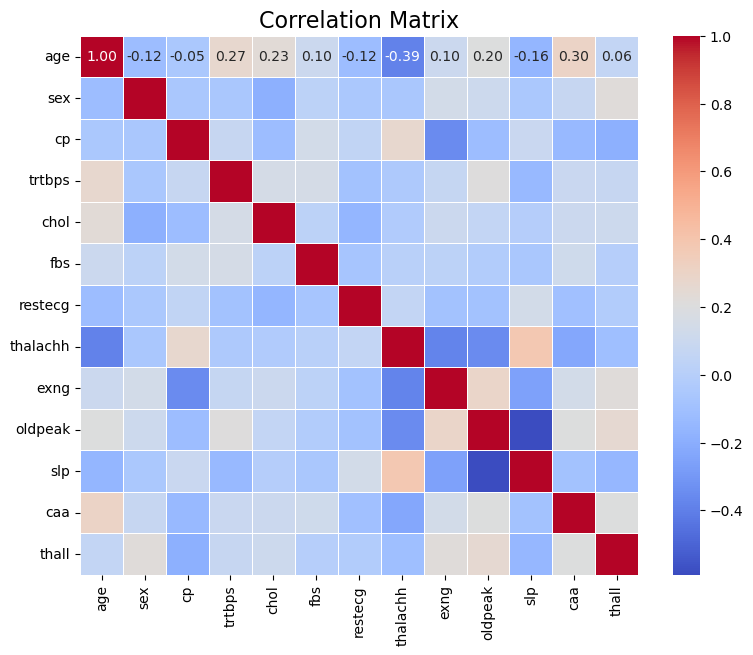

In [20]:
# Heatmap of the correlations
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()



*Intepretation: Pearson, standard correlation coefficient*
*This shows that there is no variables with strong or very strong correlations, implying that we might not need to exclude variables due to collinearity.*

Rule of thumb:
00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”
https://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf


#### 3.4.3 Relationship between Cholesterol Leves and Age

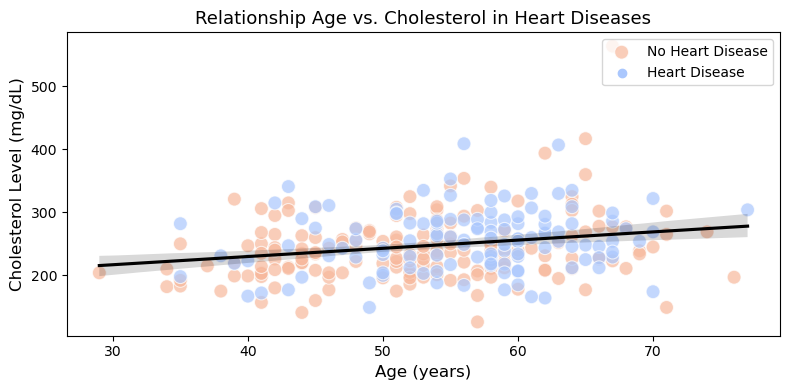

In [21]:
# Scatter plot 
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='age', y='chol', hue='output', alpha=0.7, s=100, palette='coolwarm')

# Adding a regression line
sns.regplot(data=df, x='age', y='chol', scatter=False, color='black')

# Titles and labels
plt.title('Relationship Age vs. Cholesterol in Heart Diseases', fontsize=13)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Cholesterol Level (mg/dL)', fontsize=12)
plt.legend(title='Heart Disease', loc='upper right')

# adjust legend
plt.legend(loc='upper right', labels=['No Heart Disease', 'Heart Disease'])


plt.tight_layout() 
plt.show()


#### 3.4.4 Relationship between Resting Blood Pressure and Age 

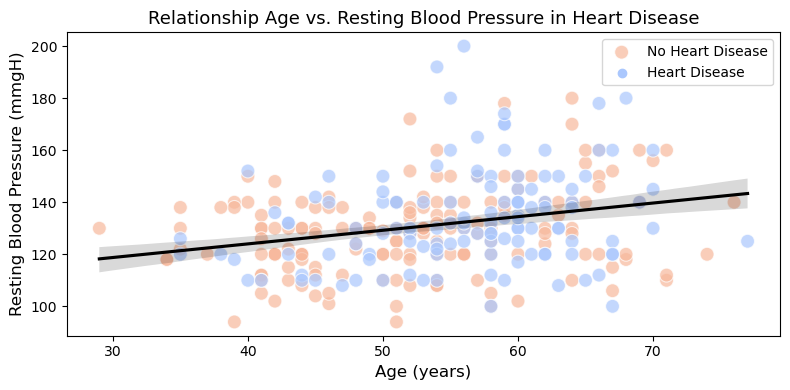

In [22]:
# Scatter plot 
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='age', y='trtbps', hue='output', alpha=0.7, s=100, palette='coolwarm')

# Adding a regression line
sns.regplot(data=df, x='age', y='trtbps', scatter=False, color='black')

# Titles and labels
plt.title('Relationship Age vs. Resting Blood Pressure in Heart Disease', fontsize=13)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Resting Blood Pressure (mmgH)', fontsize=12)
plt.legend(title='Heart Disease', loc='upper right')

# adjust legend
plt.legend(loc='upper right', labels=['No Heart Disease', 'Heart Disease'])


plt.tight_layout() 
plt.show()

## 4. Regression Analysis

### 4.1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

# Define the independent variables (X) and dependent variable (y)
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df['output']  # Target variable (output)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the linear regression model
lin_reg_model = LinearRegression()

# Train the model
lin_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg_model.predict(X_test)

# Evaluate the model
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Store evaluation metrics in a DataFrame for better presentation
eval_metrics = pd.DataFrame({
    'Metric': ['Root Mean Squared Error', 'R-squared'],
    'Value': [mse, r2]
})

# Display evaluation metrics as a table
print("\nEvaluation Metrics:")
print(eval_metrics)

# Store feature coefficients in a DataFrame
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_reg_model.coef_
})

# Display feature coefficients as a table
print("\nFeature Coefficients:")
print(coefficients)


*As the output values range from 0 to 1, then an RMSE of 0.3687 could be considered fairly large.
R² measures the proportion of variance in the target variable that is explained by the model.R² = 0.4394 suggests that your model has moderate predictive power, but it's not very strong.
The model is not very strong.*

In [ ]:
# Plot the true values vs predictions
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression Predictions vs True Values")
plt.show()

*The above graph shows that predictions are closer to the true value, implying moderate prediction power.
However it also shows that linear regression las its limitation for this case, due to the binary nature of the target variable. A better choice should be Logistic Regression.*

### 4.2 Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

# Define the independent variables (X) and dependent variable (y)
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print('-'*50)
print(f"Recall: {recall}")
print('-'*50)
print(f"Precision: {precision}")
print('-'*50)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.66%
--------------------------------------------------
Recall: 0.9411764705882353
--------------------------------------------------
Precision: 0.8888888888888888
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.89      0.94      0.91        17

    accuracy                           0.90        29
   macro avg       0.90      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

# Define the independent variables (X) and dependent variable (y)
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'slp', 'oldpeak', 'caa', 'thall']]
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print('-'*50)
print(f"Recall: {recall}")
print('-'*50)
print(f"Precision: {precision}")
print('-'*50)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.66%
--------------------------------------------------
Recall: 0.9411764705882353
--------------------------------------------------
Precision: 0.8888888888888888
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.89      0.94      0.91        17

    accuracy                           0.90        29
   macro avg       0.90      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29



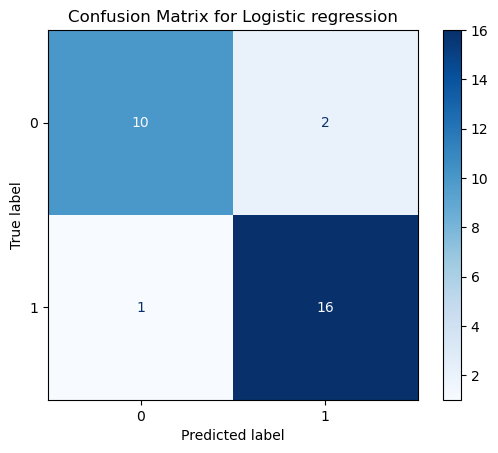

In [27]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# CM
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix for Logistic regression")
plt.show()

## 5. Machine Learning Models (90% Train - 10% Test)


### 5.1 Decision Tree Model

In [28]:
# Define Variables
X = df[['age', 'caa', 'chol', 'cp', 'exng', 'fbs', 'oldpeak', 'restecg', 'sex', 'slp', 'thall', 'thalachh', 'trtbps']]
y = df['output']  # Target

# Split Data into Train(90%) and Test(10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # random_state: ensures training and testing sets will be the same.

# Create and Train the Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_predictions = model.predict(X_test)

# Print y_test and y_predictions
comparison = {'y test': y_test,
              'y prediction:': y_predictions
             }

comparison_df = pd.DataFrame(comparison)

print(comparison_df)


     y test  y prediction:
45        1              1
157       1              1
257       0              0
42        1              0
182       0              1
9         1              1
46        1              1
173       0              1
77        1              1
196       0              1
223       0              0
33        1              0
116       1              1
280       0              1
56        1              1
217       0              0
5         1              1
225       0              0
238       0              1
75        1              1
268       0              0
84        1              0
113       1              0
287       0              1
73        1              1
251       0              1
140       1              1
147       1              1
111       1              1


#### 5.1.1 Model Evaluation

In [29]:
# Metrics
accuracy = accuracy_score(y_test, y_predictions)
precision = precision_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)

# Dataframe for metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
}

metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
print(metrics_df)

      Metric     Value
0   Accuracy  0.620690
1  Precision  0.650000
2     Recall  0.764706
3   F1 Score  0.702703


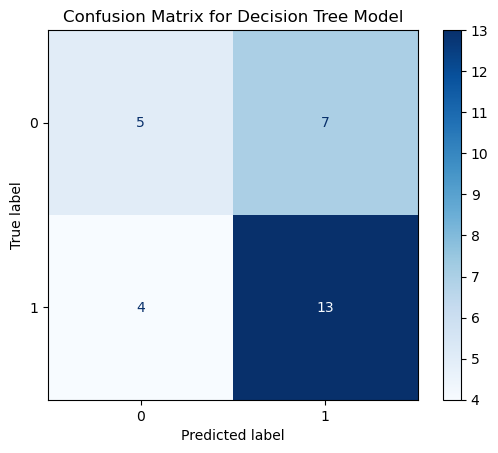

In [30]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predictions)

# CM
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

### 5.2 Random Forest Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
#random forest
#independent variables
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]

#dependent variable
y = df['output']

#split data into 90% training, 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

#make the random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

#train the model
rf_model.fit(X_train, y_train)

#make predictions
y_pred = rf_model.predict(X_test)
print(y_pred)

#accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('-'*50)

print(f'Recall: {recall}')
print('-'*50)

print(f'Precision: {precision}')
print('-'*50)

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#feature importances
importances = rf_model.feature_importances_

print('feature importances:')
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')


[1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1]
Accuracy: 0.79
--------------------------------------------------
Recall: 0.8823529411764706
--------------------------------------------------
Precision: 0.7894736842105263
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.79      0.88      0.83        17

    accuracy                           0.79        29
   macro avg       0.79      0.77      0.78        29
weighted avg       0.79      0.79      0.79        29

feature importances:
age: 0.07622261071931949
sex: 0.03819408265494806
cp: 0.12638112791307624
trtbps: 0.06414120753605913
chol: 0.0794818757408423
fbs: 0.010252553104916948
restecg: 0.01899657363105937
thalachh: 0.11972142940368452
exng: 0.061545250309018064
oldpeak: 0.11101953067392281
slp: 0.05363092838014878
caa: 0.12436022298515162
thall: 0.1160526069478528


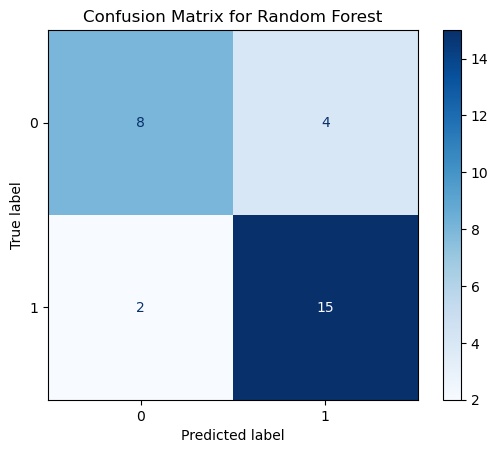

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# CM
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix for Random Forest")
plt.show()

### 5.3 Naive Bayes Model

In [33]:
#naive bayes

from sklearn.naive_bayes import GaussianNB


#split data into 90% training, 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#make the naive bayes model
nb_model = GaussianNB()

#train the model
nb_model.fit(X_train, y_train)

#make predictions
y_pred = nb_model.predict(X_test)

#accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print('-'*50)

print(f'Recall: {recall}')
print('-'*50)

print(f'Precision: {precision}')
print('-'*50)

#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 89.66%
--------------------------------------------------
Recall: 0.9411764705882353
--------------------------------------------------
Precision: 0.8888888888888888
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.89      0.94      0.91        17

    accuracy                           0.90        29
   macro avg       0.90      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29



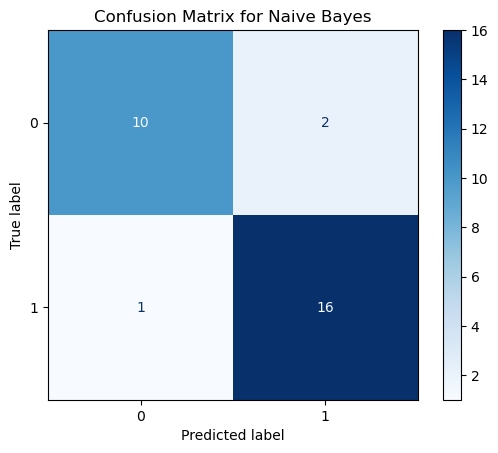

In [34]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# CM
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

### 5.4 k-Nearest Neighbor Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

# Define the independent variables (X) and dependent variable (y)
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df['output']

# Split the data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the k-NN model (k=5 is a common choice, but you can experiment with different values)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print('-'*50)
print(f'Recall: {recall}')
print('-'*50)
print(f'Precision: {precision}')
print('-'*50)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 75.86%
--------------------------------------------------
Recall: 0.8823529411764706
--------------------------------------------------
Precision: 0.75
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.75      0.88      0.81        17

    accuracy                           0.76        29
   macro avg       0.76      0.73      0.74        29
weighted avg       0.76      0.76      0.75        29



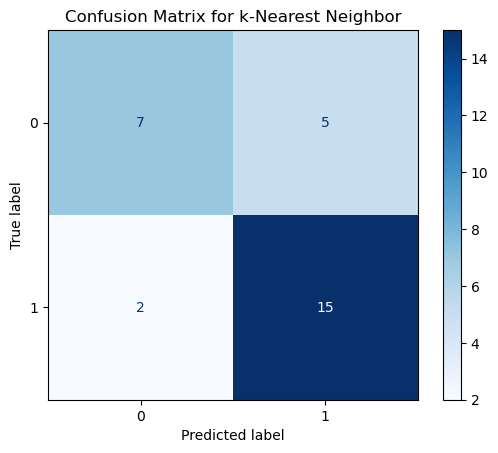

In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# CM
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix for k-Nearest Neighbor")
plt.show()

### 5.5 Neural Network (multi-layer perceptron)

#### Why MLP?
- Flexible architecture: You can experiment with different numbers of neurons and layers to find the best fit.
- Nonlinearity: Neural networks can model complex, non-linear relationships in the data, which might improve prediction performance.
- Efficient optimization: Using the Adam solver makes it easy to optimize without manually tuning the learning rate.

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the independent variables (X) and dependent variable (y)
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df['output']

# Split the data into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the MLPClassifier (feedforward neural network)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, solver='adam')

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred = mlp_model.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print('-'*50)
print(f'Recall: {recall}')
print('-'*50)
print(f'Precision: {precision}')
print('-'*50)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 86.21%
--------------------------------------------------
Recall: 0.9411764705882353
--------------------------------------------------
Precision: 0.8421052631578947
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.84      0.94      0.89        17

    accuracy                           0.86        29
   macro avg       0.87      0.85      0.85        29
weighted avg       0.87      0.86      0.86        29



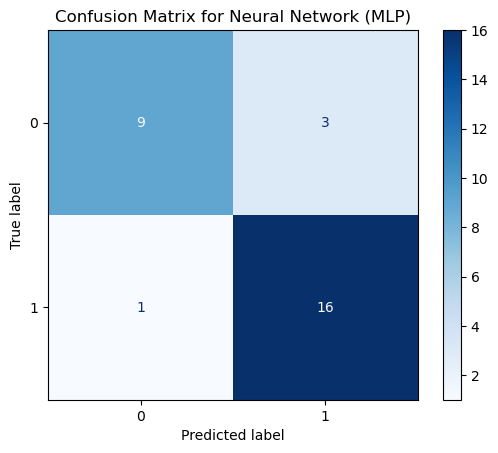

In [38]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# CM
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix for Neural Network (MLP)")
plt.show()